In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("train.csv")  # or use the GitHub link if you prefer

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Keep Data We Need
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())



In [4]:
# Basic Descriptive Statistics
print("Mean age:", df['Age'].mean())
print("Median age:", df['Age'].median())
print("Std of age:", df['Age'].std())

print("Mean fare:", df['Fare'].mean())
print("Median fare:", df['Fare'].median())
print("Std of fare:", df['Fare'].std())

# Overall Survival Rate
survival_rate = df['Survived'].mean() * 100
print(f"Overall survival rate: {survival_rate:.2f}%")

# Survival by Gender
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_gender)

# Survival by Class
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)

# Survival by Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,60,80], labels=['Child','Teen','Adult','Senior'])
survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100
print(survival_by_age)


Mean age: 29.36158249158249
Median age: 28.0
Std of age: 13.019696550973194
Mean fare: 32.204207968574636
Median fare: 14.4542
Std of fare: 49.693428597180905
Overall survival rate: 38.38%
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
AgeGroup
Child     57.971014
Teen      42.857143
Adult     36.575342
Senior    22.727273
Name: Survived, dtype: float64


/tmp/ipykernel_28522/2304689401.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100


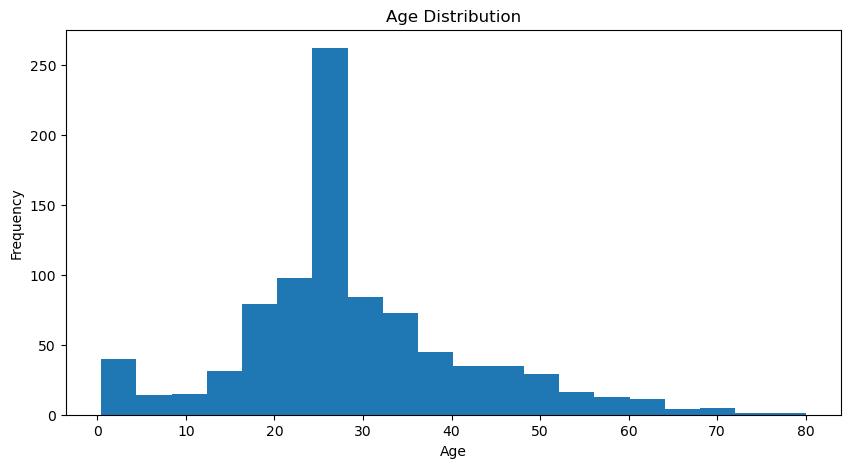

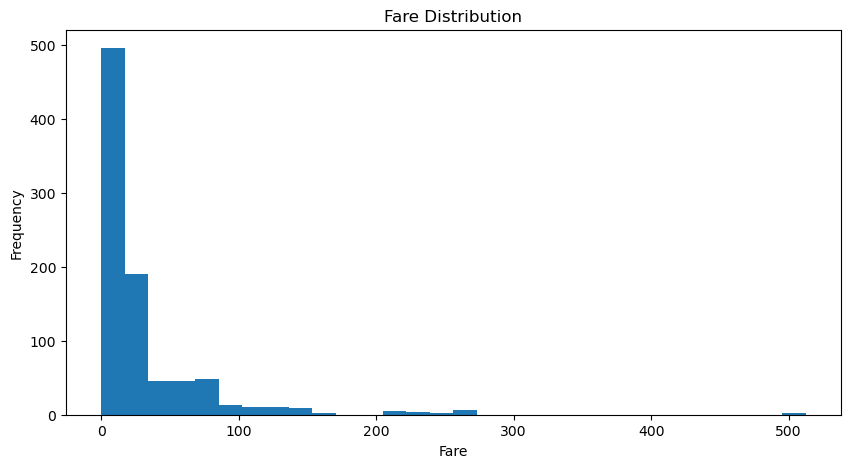

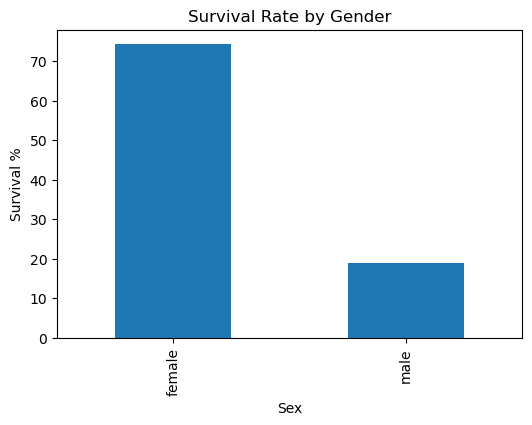

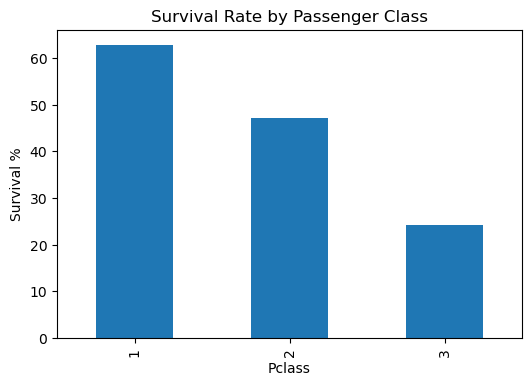

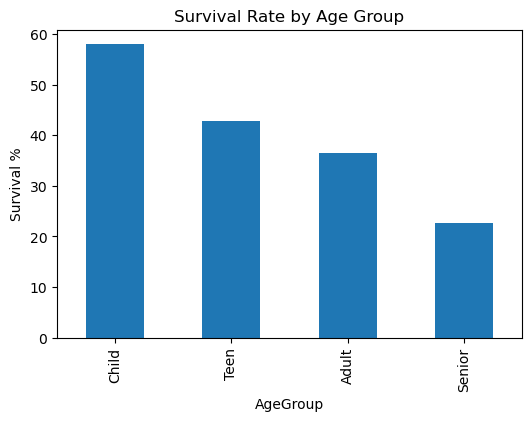

In [5]:
# Histogram of Age
df['Age'].plot(
    kind='hist',
    bins=20,
    figsize=(10,5),
    title='Age Distribution'
)
plt.xlabel('Age')
plt.show()

# Histogram of Fare
df['Fare'].plot(
    kind='hist',
    bins=30,
    figsize=(10,5),
    title='Fare Distribution'
)
plt.xlabel('Fare')
plt.show()

# Bar chart: Survival by Gender
survival_by_gender.plot(
    kind='bar',
    figsize=(6,4),
    title='Survival Rate by Gender'
)
plt.ylabel('Survival %')
plt.show()

# Bar chart: Survival by Class
survival_by_class.plot(
    kind='bar',
    figsize=(6,4),
    title='Survival Rate by Passenger Class'
)
plt.ylabel('Survival %')
plt.show()

# Bar chart: Survival by Age Group
survival_by_age.plot(
    kind='bar',
    figsize=(6,4),
    title='Survival Rate by Age Group'
)
plt.ylabel('Survival %')
plt.show()